### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from tqdm import tqdm
import argparse
from datetime import datetime

import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torchvision.utils import save_image


# import the autoencoder
from autoencoder import Autoencoder
from solver import train_vali_all_epochs, dev_train_vali_all_epochs, test

%load_ext autoreload
%autoreload 2


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
device = torch.device('cpu')

Using device: cuda


In [3]:
run_id = datetime.today().strftime("%Y-%m-%d_%H-%M-%S")
save_path = os.getenv("HOME") + '/sparsify_models/AE/MNIST/' +run_id +'/'
print(save_path)

/home/david/sparsify_models/AE/MNIST/2024-10-03_11-07-07/


## Load datasets

In [4]:
# dload the CIFAR10 dataset
cifar_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
cifar_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

print('Number of CIFAR10 train images: {}'.format(len(cifar_trainset)))
print('Number of CIFAR10 test images: {}'.format(len(cifar_testset)))

Number of CIFAR10 train images: 60000
Number of CIFAR10 test images: 10000


## Autoencoder

In [5]:
## define the data loader
batch_size = 128
train_loader = DataLoader(cifar_trainset, batch_size=batch_size, shuffle=True, num_workers=6)
test_loader = DataLoader(cifar_testset, batch_size=batch_size, shuffle=False, num_workers=6)

## define the model
n_input = 28*28#32*32*3
n_layers = 3
n_hidden_ls = [512,256,32]

model = Autoencoder(n_input,n_hidden_ls,n_layers)
print(model)

## define the optimizer 

optimizer = torch.optim.SGD(model.parameters(), lr=1e-1,momentum=0.9)

Autoencoder(
  (encoder): Sequential(
    (encoder_1): Linear(in_features=784, out_features=512, bias=True)
    (encoder_2): Linear(in_features=512, out_features=256, bias=True)
    (encoder_3): Linear(in_features=256, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (decoder_1): Linear(in_features=32, out_features=256, bias=True)
    (decoder_2): Linear(in_features=256, out_features=512, bias=True)
    (decoder_3): Linear(in_features=512, out_features=784, bias=True)
  )
)


In [6]:
n_epochs = 15
train_losses, vali_losses = train_vali_all_epochs(model,train_loader,test_loader,optimizer,n_epochs,device,save_path=save_path+'Static/')

Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000480: 100%|██████████| 469/469 [00:05<00:00, 93.24it/s]

====> Epoch: 0 Average loss: 0.0620



/home/david/Documents/UNI_LOCAL/PyTorch/MarkosCode/solver.py:266: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0455
Directory created: /home/david/sparsify_models/AE/MNIST/2024-10-03_11-07-07/Static/
Weights saved.


Train Epoch: 1 [44928/60000 (100%)]	Loss: 0.000353: 100%|██████████| 469/469 [00:04<00:00, 101.73it/s]


====> Epoch: 1 Average loss: 0.0391
====> Test set loss: 0.0344
Weights saved.


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000314: 100%|██████████| 469/469 [00:04<00:00, 110.50it/s]

====> Epoch: 2 Average loss: 0.0322


====> Test set loss: 0.0298
Weights saved.


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000277: 100%|██████████| 469/469 [00:04<00:00, 105.62it/s]

====> Epoch: 3 Average loss: 0.0289


====> Test set loss: 0.0271
Weights saved.


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000258: 100%|██████████| 469/469 [00:05<00:00, 88.65it/s]

====> Epoch: 4 Average loss: 0.0264


====> Test set loss: 0.0248
Weights saved.


Train Epoch: 5 [44928/60000 (100%)]	Loss: 0.000242: 100%|██████████| 469/469 [00:05<00:00, 92.25it/s]

====> Epoch: 5 Average loss: 0.0245


====> Test set loss: 0.0233
Weights saved.


Train Epoch: 6 [44928/60000 (100%)]	Loss: 0.000239: 100%|██████████| 469/469 [00:04<00:00, 102.33it/s]

====> Epoch: 6 Average loss: 0.0232


====> Test set loss: 0.0222
Weights saved.


Train Epoch: 7 [44928/60000 (100%)]	Loss: 0.000217: 100%|██████████| 469/469 [00:04<00:00, 103.49it/s]


====> Epoch: 7 Average loss: 0.0221
====> Test set loss: 0.0211
Weights saved.


Train Epoch: 8 [44928/60000 (100%)]	Loss: 0.000219: 100%|██████████| 469/469 [00:04<00:00, 107.95it/s]


====> Epoch: 8 Average loss: 0.0212
====> Test set loss: 0.0203
Weights saved.


Train Epoch: 9 [44928/60000 (100%)]	Loss: 0.000205: 100%|██████████| 469/469 [00:04<00:00, 103.32it/s]

====> Epoch: 9 Average loss: 0.0203


====> Test set loss: 0.0194
Weights saved.


Train Epoch: 10 [44928/60000 (100%)]	Loss: 0.000209: 100%|██████████| 469/469 [00:04<00:00, 108.94it/s]


====> Epoch: 10 Average loss: 0.0195
====> Test set loss: 0.0186
Weights saved.


Train Epoch: 11 [44928/60000 (100%)]	Loss: 0.000187: 100%|██████████| 469/469 [00:04<00:00, 109.34it/s]


====> Epoch: 11 Average loss: 0.0188
====> Test set loss: 0.0181
Weights saved.


Train Epoch: 12 [44928/60000 (100%)]	Loss: 0.000196: 100%|██████████| 469/469 [00:04<00:00, 111.66it/s]

====> Epoch: 12 Average loss: 0.0183


====> Test set loss: 0.0177
Weights saved.


Train Epoch: 13 [44928/60000 (100%)]	Loss: 0.000188: 100%|██████████| 469/469 [00:04<00:00, 112.90it/s]

====> Epoch: 13 Average loss: 0.0181


====> Test set loss: 0.0175
Weights saved.


Train Epoch: 14 [44928/60000 (100%)]	Loss: 0.000180: 100%|██████████| 469/469 [00:04<00:00, 110.63it/s]

====> Epoch: 14 Average loss: 0.0179


====> Test set loss: 0.0174
Weights saved.
All train losses saved.


Text(0.5, 1.0, 'Loss AE')

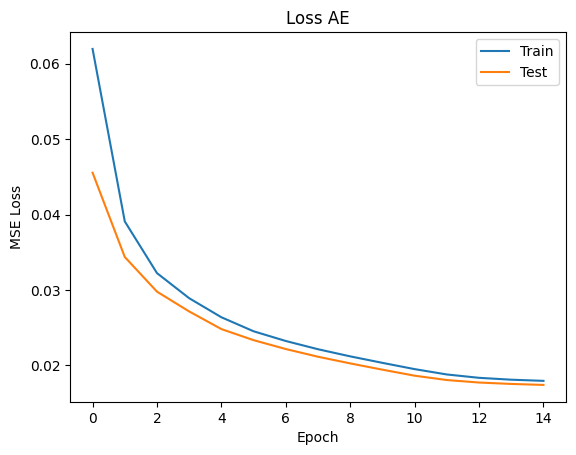

In [7]:

plt.figure()
plt.plot(train_losses,label='Train')
plt.plot(vali_losses,label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss AE')

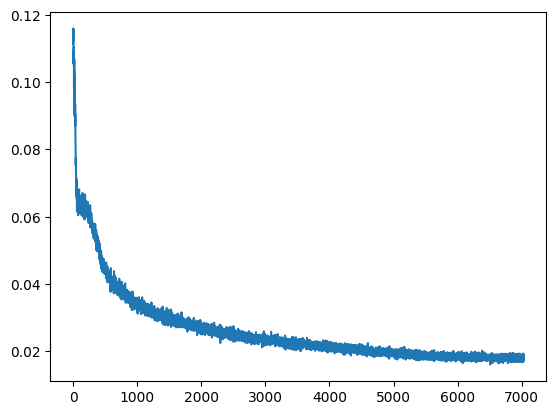

In [8]:
train_loss_all = np.load(save_path + 'Static/' + 'all_train_losses.npy')
plt.plot(np.concatenate(train_loss_all))

In [9]:
# ## test the model
loss, decoded, test = test(model,test_loader,device)

====> Test set loss: 0.0174


In [10]:
print(decoded.shape)
print(test.shape)

torch.Size([16, 784])
torch.Size([16, 1, 28, 28])


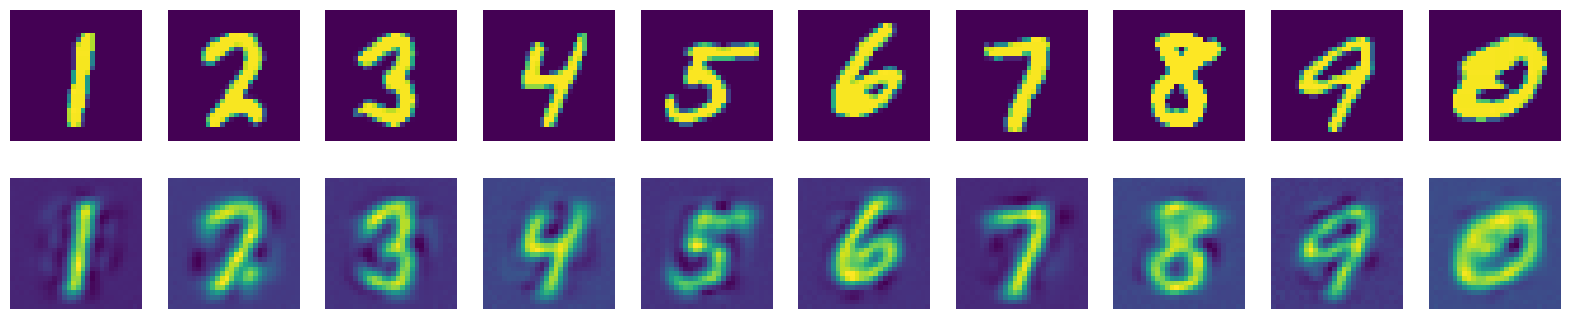

In [11]:
# ## plot the reconstructed images
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(np.transpose(test[i].numpy(),(1,2,0)))
    plt.axis('off')

    plt.subplot(2,10,i+11)
    plt.imshow(np.transpose(decoded[i].detach().numpy().reshape(1,28,28),(1,2,0)))
    plt.axis('off')

plt.show()

## Developing AE

In [12]:
model = Autoencoder(n_input,n_hidden_ls,n_layers)
size_ls = [4,10,16,32]
manner = 'cell_division'

In [13]:
train_loss, test_loss = dev_train_vali_all_epochs(model,size_ls,manner,train_loader,test_loader,optimizer,n_epochs,device,save_path=save_path+'Dev/{}/'.format(manner))

Directory created: /home/david/sparsify_models/AE/MNIST/2024-10-03_11-07-07/Dev/cell_division/


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.001318: 100%|██████████| 469/469 [00:03<00:00, 131.51it/s]

====> Epoch: 0 Average loss: 0.1249


====> Test set loss: 0.1272
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


/home/david/Documents/UNI_LOCAL/PyTorch/MarkosCode/solver.py:184: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(save_path + 'model_weights_epoch{}.pt

====> Epoch: 1 Average loss: 0.0603


====> Test set loss: 0.0491
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 2 [44928/60000 (100%)]	Loss: 0.000540: 100%|██████████| 469/469 [00:04<00:00, 110.71it/s]

====> Epoch: 2 Average loss: 0.0488


====> Test set loss: 0.0481
Weights saved.
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 3 [44928/60000 (100%)]	Loss: 0.000513: 100%|██████████| 469/469 [00:04<00:00, 106.88it/s]

====> Epoch: 3 Average loss: 0.0488


====> Test set loss: 0.0480
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 4 [44928/60000 (100%)]	Loss: 0.000453: 100%|██████████| 469/469 [00:04<00:00, 107.30it/s]

====> Epoch: 4 Average loss: 0.0470


====> Test set loss: 0.0432
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 5 [44928/60000 (100%)]	Loss: 0.000455: 100%|██████████| 469/469 [00:04<00:00, 111.55it/s]

====> Epoch: 5 Average loss: 0.0425


====> Test set loss: 0.0418
Weights saved.
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 6 [44928/60000 (100%)]	Loss: 0.000437: 100%|██████████| 469/469 [00:04<00:00, 114.64it/s]

====> Epoch: 6 Average loss: 0.0420


====> Test set loss: 0.0412
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 7 [44928/60000 (100%)]	Loss: 0.000379: 100%|██████████| 469/469 [00:04<00:00, 113.35it/s]


====> Epoch: 7 Average loss: 0.0397
====> Test set loss: 0.0371
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 8 [44928/60000 (100%)]	Loss: 0.000352: 100%|██████████| 469/469 [00:04<00:00, 111.02it/s]

====> Epoch: 8 Average loss: 0.0359


====> Test set loss: 0.0340
Weights saved.
debug var_dim 0
debug var_dim 0
debug var_dim 1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 9 [44928/60000 (100%)]	Loss: 0.000351: 100%|██████████| 469/469 [00:04<00:00, 115.03it/s]

====> Epoch: 9 Average loss: 0.0337


====> Test set loss: 0.0318
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 10 [44928/60000 (100%)]	Loss: 0.000342: 100%|██████████| 469/469 [00:04<00:00, 112.27it/s]

====> Epoch: 10 Average loss: 0.0320


====> Test set loss: 0.0314
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 11 [44928/60000 (100%)]	Loss: 0.000342: 100%|██████████| 469/469 [00:04<00:00, 114.96it/s]

====> Epoch: 11 Average loss: 0.0318


====> Test set loss: 0.0314
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 12 [44928/60000 (100%)]	Loss: 0.000342: 100%|██████████| 469/469 [00:04<00:00, 113.36it/s]

====> Epoch: 12 Average loss: 0.0318


====> Test set loss: 0.0313
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 13 [44928/60000 (100%)]	Loss: 0.000314: 100%|██████████| 469/469 [00:04<00:00, 115.73it/s]

====> Epoch: 13 Average loss: 0.0317


====> Test set loss: 0.0313
Weights saved.
debug var_dim -1
debug var_dim -1
debug var_dim -1
debug nan in encoder weights tensor(0)
debug nan in encoder bias tensor(0)
debug nan in decoder weights tensor(0)


Train Epoch: 14 [44928/60000 (100%)]	Loss: 0.000319: 100%|██████████| 469/469 [00:04<00:00, 114.70it/s]


====> Epoch: 14 Average loss: 0.0317
====> Test set loss: 0.0312
Weights saved.
All train losses saved.


Text(0.5, 1.0, 'Loss DAE')

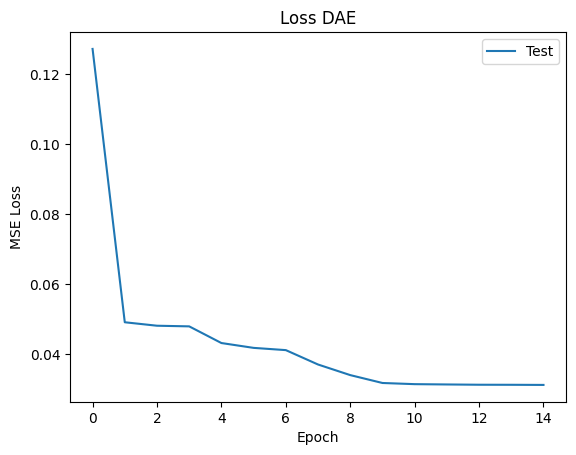

In [14]:
plt.figure()
# plt.plot(train_loss,label='Train')
plt.plot(test_loss,label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss DAE')

In [15]:
train_loss_all = np.load(save_path + 'Dev/cell_division/' + 'all_train_losses.npy')

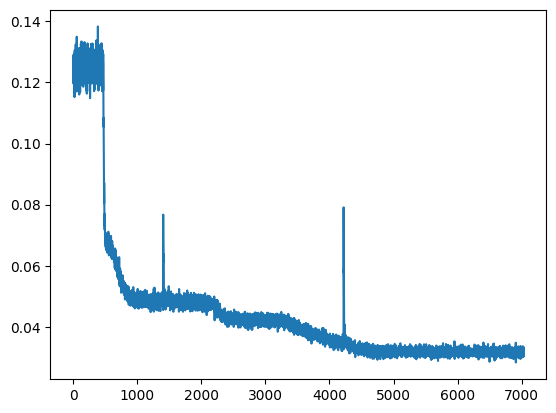

In [16]:
plt.plot(np.concatenate(train_loss_all))
# plt.ylim(0,0.5)